In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="vansh@11singH",
    database="demo3")

cur = db.cursor()

# List all unique cities where customers are located

In [6]:
query = """select distinct (customer_city) from customers"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# Count the number of orders placed in 2017

In [7]:
query = """select count(order_id) as Total_order from orderss 
where year(order_purchase_timestamp) = 2017; """

cur.execute(query)

data = cur.fetchall()

"Total order placed in 2017 are", data[0][0]

('Total order placed in 2017 are', 90202)

# Find the total sale per category

In [8]:
query = """select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category"""

cur.execute(query)

data = cur.fetchall()


df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,6080863.92
1,FURNITURE DECORATION,17162116.70
2,TELEPHONY,5842584.61
3,BED TABLE BATH,20550644.05
4,AUTOMOTIVE,10227531.97
...,...,...
69,CDS MUSIC DVDS,14393.16
70,LA CUISINE,34962.36
71,FASHION CHILDREN'S CLOTHING,9428.04
72,PC GAMER,26093.16


# Calculate the percentage of orders that were paid in installment

In [9]:
query = """select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()

("The percentage of orders that were paid in installment is", data[0][0])

('The percentage of orders that were paid in installment is',
 Decimal('99.9981'))

# Count the number of customers from each state

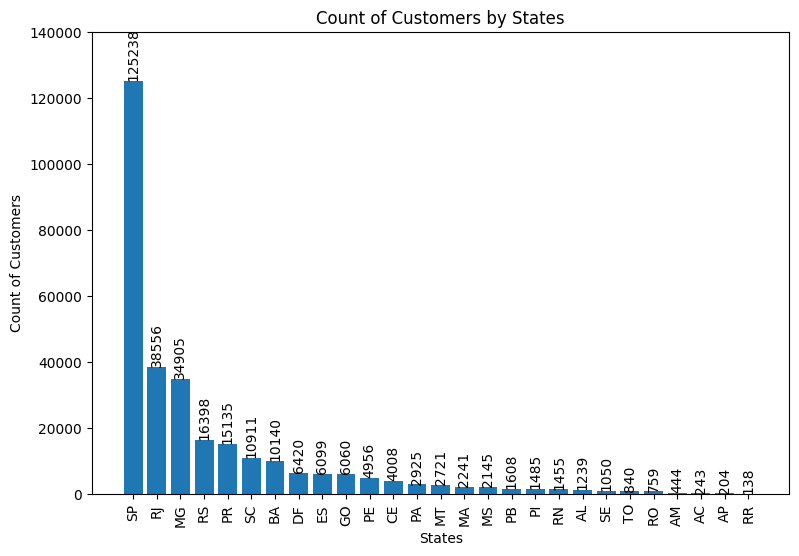

In [10]:
query = """select customer_state, count(customer_id) from customers
group by customer_state"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["State", "Total Customers"])
#df
df = df.sort_values(by = "Total Customers", ascending = False)
plt.figure(figsize = (9,6))
bars = plt.bar(df["State"], df["Total Customers"], width = 0.8)
plt.gca().bar_label(bars, rotation= 90)
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylim(0, 140000)
plt.ylabel("Count of Customers")
plt.title("Count of Customers by States")
plt.show()

# *******************************************INTERMEDIATE LEVEL*********************************************

# Calculate the number of orders per month in 2018

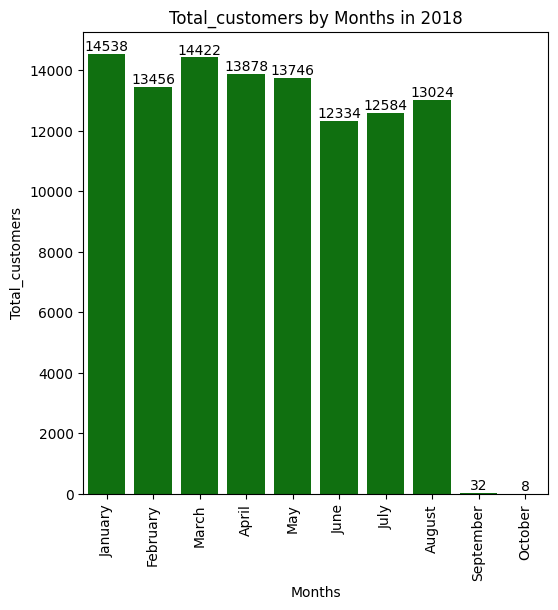

In [11]:

query = """with cte as
(SELECT month(order_purchase_timestamp) as months, 
count(order_id) as total_orders
FROM demo3.orderss
where year(order_purchase_timestamp) = '2018'
group by months
order by months), 
cte1 as
(select distinct month(order_purchase_timestamp) as months, monthname(order_purchase_timestamp) as month_name
FROM demo3.orderss
where year(order_purchase_timestamp) = '2018')

select c1.month_name, c.total_orders
from cte c join cte1 c1
on c.months = c1.months"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Months", "Total_customers"])

plt.figure(figsize = (6,6))
bars = sns.barplot(data = df, x = df["Months"], y = df["Total_customers"], color = 'green')
bars.bar_label(bars.containers[0])
plt.xticks(rotation = 90)
plt.xlabel("Months")
plt.ylabel("Total_customers")
plt.title("Total_customers by Months in 2018")
plt.show()

# Find the average number of products per order grouped by customer cities

In [12]:
query =  """with count_per_order as
(select orderss.order_id, orderss.customer_id, count(order_items.order_id) as oc
from orderss join order_items
on orderss.order_id = order_items.order_id
group by orderss.order_id, orderss.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) Average_per_order
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by Average_per_order desc"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer's City", "Average per order"])
df.head(10)


,Customer's City,Average per order
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
5,cidelandia,16.00
6,curralinho,16.00
7,picarra,16.00
8,morro de sao paulo,16.00
9,teixeira soares,16.00


# Calculate the percentage of total revenue contributed by each product category

In [13]:
query = """select products.product_category category, 
round(sum(payments.payment_value)/(select sum(payment_value) from payments),2)*100 revenue 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by revenue desc"""

cur.execute(query)

data = cur.fetchall()
# data

df = pd.DataFrame(data, columns = ["Category", "Sales/revenue%"])
df.head(10)

,Category,Sales/revenue%
0,bed table bath,64.0
1,HEALTH BEAUTY,62.0
2,computer accessories,59.0
3,Furniture Decoration,54.0
4,Watches present,54.0
5,sport leisure,52.0
6,housewares,41.0
7,automotive,32.0
8,Garden tools,31.0
9,Cool Stuff,29.0


# Identify the correlation between product price and the number of times a product has been purchased.

In [14]:
import numpy as np
query = """select products.product_category, count(order_items.product_id),
 round(avg(order_items.price),2)
 from products join order_items
 on products.product_id = order_items.product_id
 group by products.product_category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Product Category", "Order_Quantity", "Product Average Price"])

arr1 = df["Order_Quantity"]
arr2 = df["Product Average Price"]
a = np.corrcoef([arr1,arr2])
print (a)
print ("The correlation between product price and the number of times a product has been purchased is", a[0][1])


[[ 1.         -0.10631514]
 [-0.10631514  1.        ]]
The correlation between product price and the number of times a product has been purchased is -0.10631514167157569


# Calculate the total revenue generated by each seller and rank them by revenue

In [24]:
import numpy as np
query = """select *, dense_rank() over (order by revenue desc) as rn from 
(select order_items.seller_id, round(sum(payments.payment_value),2) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Seller ID", "Total Sale per ID", "Rank"])
df.head(10) 


,Seller ID,Total Sale per ID,Rank
0,7c67e1448b00f6e969d365cea6b010ab,2028667.63,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,1232888.16,2
2,4a3ca9315b744ce9f8e9374361493884,1204981.08,3
3,1f50f920176fa81dab994f9023523100,1161013.68,4
4,53243585a1d6dc2643021fd1853d8905,1139612.32,5
5,da8622b14eb17ae2831f4ac5b9dab84a,1088877.28,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,1056664.48,7
7,955fee9216a65b617aa5c0531780ce60,945289.20,8
8,fa1c13f2614d7b5c4749cbc52fecda94,826052.92,9
9,7e93a43ef30c4f03f38b393420bc753a,740536.84,10


# ADVANCE LEVEL

# Calculate the moving average of order values for each customer over their order history

In [17]:
query = """select customer_id, order_purchase_timestamp, payment, 
avg(payment) over (partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg from 
(select orderss.customer_id, orderss.order_purchase_timestamp, payments.payment_value as payment
from orderss join payments
on orderss.order_id = payments.order_id) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Customer ID", "Order purchase timestamp", "Payment value", "Moving Average"])
df.head(10)

,Customer ID,Order purchase timestamp,Payment value,Moving Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
5,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
6,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
7,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
8,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
9,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998


# Calculate the cumulative sales per month for each year

In [18]:
query = """select years, months, payment,
sum(payment) over (order by years, months) as cumulative_sale
from
(select year (orderss.order_purchase_timestamp) as years, 
month(orderss.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orderss join payments
on orderss.order_id = payments.order_id
group by years, months order by years, months) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Years", "Months", "Monthly Sales", "Cumulative Sales"])
df

,Years,Months,Monthly Sales,Cumulative Sales
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


# Calculate the year over year growth rate of total sale

In [19]:
query = """with a as 
(select year (orderss.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orderss join payments
on orderss.order_id = payments.order_id
group by years order by years)

select years, payment, ((payment - lag(payment, 1) over (order by years))/
lag(payment,1) over (order by years))*100
as Growth_rate from a;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Years", "Yearly Sales", "Growth Rate%"])
df

,Years,Yearly Sales,Growth Rate%
0,2016,237449.36,NaN
1,2017,28998986.91,12112.703757
2,2018,34799052.21,20.000924


# Calculate the retention rate of customer, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [20]:
query = """with a as 
(select customers.customer_id, 
min(orderss.order_purchase_timestamp) as first_order
from customers join orderss
on customers.customer_id = orderss.customer_id
group by customers.customer_id), 

b as (select a.customer_id, count(distinct orderss.order_purchase_timestamp)
from a join orderss
on a.customer_id = orderss.customer_id
and orderss.order_purchase_timestamp > first_order 
and orderss.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id;"""

cur.execute(query)

data = cur.fetchall()

("None of the customer made purchase within 6 months, therefore the value is", data[0][0])

('None of the customer made purchase within 6 months, therefore the value is',
 None)

# Identify the customer who spent most money each year

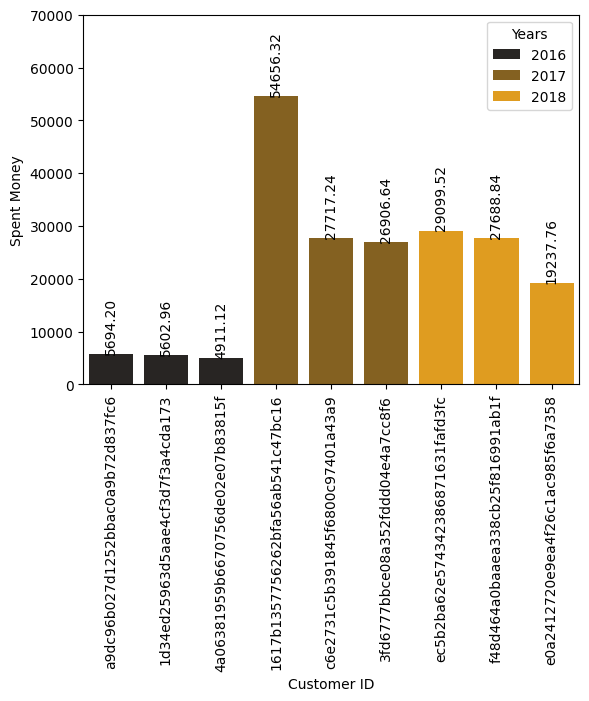

In [21]:
query = """select years, customer_id, payment, d_rank from 
(select year(orderss.order_purchase_timestamp) years, orderss.customer_id,
round(sum(payments.payment_value),2) payment,
dense_rank() over(partition by year(orderss.order_purchase_timestamp) 
order by sum(payments.payment_value) desc) d_rank
from orderss join payments
on orderss.order_id = payments.order_id
group by years, orderss.customer_id) as a
where d_rank <=3"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Years", "Customer ID", "Spent Money", "Rank"])


bars = sns.barplot(x = "Customer ID", y = "Spent Money", data = df, hue = "Years", palette = 'dark:orange')
for container in bars.containers:
    bars.bar_label(container, fmt='%.2f', rotation = 90)
plt.ylim(0 , 70000)
plt.xticks(rotation = 90)
plt.show()